### numpy、pandas，paddle

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import paddle.fluid as fluid
import tensorflow as tf
from tensorflow import keras

### Load data

In [2]:
#file='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv('./iris.data',header=None)

In [3]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df[4].unique() #Data deduplication

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Data analysis

In [5]:
flowers_label=np.asarray(sorted([0,1,2]*50)) # Define target value
flowers_feature=df.iloc[:,:4].values # Feature


# mix
index = np.arange(150)
np.random.shuffle(index)
flowers_label = flowers_label[index]
flowers_feature = flowers_feature[index]

### Split data: 100 train, 50 validation

In [6]:
x_valid, x_train = flowers_feature[:50],flowers_feature[50:]
y_valid, y_train = flowers_label[:50],flowers_label[50:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
x_train.shape[1:]

(50, 4) (50,)
(100, 4) (100,)


(4,)

### Use Keras build Dense model

In [11]:
#paddle.fluid.layers.fc == keras.layers.Dense
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=x_train.shape[1:]),# relu 线性整流函数，由直变曲
    keras.layers.Dense(3, activation='softmax') # softmax 数学运算，变成概率，谁大，选择谁
])

model.compile(loss="sparse_categorical_crossentropy",
              #optimizer='sgd',
              optimizer=keras.optimizers.SGD(lr = 0.01),
              metrics=["accuracy"])

### Train & fit

In [12]:
history = model.fit(x_train, y_train, epochs=1000,
                   validation_data=(x_valid,y_valid))

Train on 100 samples, validate on 50 samples
Epoch 1/1000
100/100 [==============================] - 0s 2ms/sample - loss: 1.9693 - accuracy: 0.3200 - val_loss: 1.1048 - val_accuracy: 0.3600
Epoch 2/1000
100/100 [==============================] - 0s 209us/sample - loss: 1.0397 - accuracy: 0.4700 - val_loss: 0.9451 - val_accuracy: 0.6200
Epoch 3/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.8958 - accuracy: 0.7300 - val_loss: 0.8896 - val_accuracy: 0.6800
Epoch 4/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.8369 - accuracy: 0.7500 - val_loss: 0.8804 - val_accuracy: 0.6200
Epoch 5/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.8057 - accuracy: 0.6900 - val_loss: 0.7825 - val_accuracy: 0.7200
Epoch 6/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.7477 - accuracy: 0.7200 - val_loss: 0.7898 - val_accuracy: 0.6200
Epoch 7/1000
100/100 [==============================] - 0s 180us/samp

Epoch 56/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.3436 - accuracy: 0.9400 - val_loss: 0.3806 - val_accuracy: 0.9000
Epoch 57/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.3369 - accuracy: 0.9400 - val_loss: 0.4003 - val_accuracy: 0.8000
Epoch 58/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.3451 - accuracy: 0.8900 - val_loss: 0.4650 - val_accuracy: 0.6200
Epoch 59/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.3601 - accuracy: 0.7800 - val_loss: 0.4584 - val_accuracy: 0.6800
Epoch 60/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.3663 - accuracy: 0.8300 - val_loss: 0.3620 - val_accuracy: 0.9800
Epoch 61/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.3254 - accuracy: 0.9700 - val_loss: 0.3891 - val_accuracy: 0.8400
Epoch 62/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.3414 - accuracy: 0.8900

Epoch 111/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.2548 - accuracy: 0.9600 - val_loss: 0.2934 - val_accuracy: 0.9000
Epoch 112/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.2548 - accuracy: 0.9500 - val_loss: 0.2689 - val_accuracy: 0.9800
Epoch 113/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.2476 - accuracy: 0.9700 - val_loss: 0.2674 - val_accuracy: 0.9800
Epoch 114/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.2426 - accuracy: 0.9700 - val_loss: 0.2813 - val_accuracy: 0.9200
Epoch 115/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.2465 - accuracy: 0.9500 - val_loss: 0.3108 - val_accuracy: 0.8600
Epoch 116/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.2565 - accuracy: 0.9300 - val_loss: 0.3043 - val_accuracy: 0.8600
Epoch 117/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.2546 - accuracy:

100/100 [==============================] - 0s 189us/sample - loss: 0.1945 - accuracy: 0.9700 - val_loss: 0.2215 - val_accuracy: 0.9800
Epoch 166/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1964 - accuracy: 0.9600 - val_loss: 0.2123 - val_accuracy: 0.9800
Epoch 167/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1949 - accuracy: 0.9700 - val_loss: 0.2110 - val_accuracy: 0.9800
Epoch 168/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.1977 - accuracy: 0.9700 - val_loss: 0.2090 - val_accuracy: 0.9800
Epoch 169/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1933 - accuracy: 0.9800 - val_loss: 0.2123 - val_accuracy: 0.9800
Epoch 170/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.2009 - accuracy: 0.9600 - val_loss: 0.2245 - val_accuracy: 0.9600
Epoch 171/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1937 - accuracy: 0.9600 - val_l

Epoch 220/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1644 - accuracy: 0.9600 - val_loss: 0.2310 - val_accuracy: 0.9200
Epoch 221/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1813 - accuracy: 0.9500 - val_loss: 0.1758 - val_accuracy: 0.9800
Epoch 222/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1641 - accuracy: 0.9700 - val_loss: 0.1898 - val_accuracy: 0.9800
Epoch 223/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1655 - accuracy: 0.9700 - val_loss: 0.2113 - val_accuracy: 0.9200
Epoch 224/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1719 - accuracy: 0.9600 - val_loss: 0.1909 - val_accuracy: 0.9800
Epoch 225/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1764 - accuracy: 0.9500 - val_loss: 0.1743 - val_accuracy: 0.9800
Epoch 226/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1595 - accuracy:

100/100 [==============================] - 0s 189us/sample - loss: 0.1437 - accuracy: 0.9500 - val_loss: 0.1582 - val_accuracy: 0.9800
Epoch 275/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1414 - accuracy: 0.9700 - val_loss: 0.1586 - val_accuracy: 0.9800
Epoch 276/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1413 - accuracy: 0.9700 - val_loss: 0.1693 - val_accuracy: 0.9800
Epoch 277/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1424 - accuracy: 0.9500 - val_loss: 0.2055 - val_accuracy: 0.9200
Epoch 278/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1676 - accuracy: 0.9500 - val_loss: 0.1568 - val_accuracy: 0.9400
Epoch 279/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1440 - accuracy: 0.9600 - val_loss: 0.2008 - val_accuracy: 0.9200
Epoch 280/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1581 - accuracy: 0.9400 - val_l

Epoch 329/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1565 - accuracy: 0.9500 - val_loss: 0.1362 - val_accuracy: 0.9800
Epoch 330/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1259 - accuracy: 0.9900 - val_loss: 0.1370 - val_accuracy: 0.9800
Epoch 331/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1237 - accuracy: 0.9700 - val_loss: 0.1438 - val_accuracy: 0.9800
Epoch 332/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1282 - accuracy: 0.9700 - val_loss: 0.1622 - val_accuracy: 0.9400
Epoch 333/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1383 - accuracy: 0.9600 - val_loss: 0.1443 - val_accuracy: 0.9800
Epoch 334/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1248 - accuracy: 0.9700 - val_loss: 0.1328 - val_accuracy: 0.9800
Epoch 335/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.1241 - accuracy:

100/100 [==============================] - 0s 189us/sample - loss: 0.1163 - accuracy: 0.9700 - val_loss: 0.1549 - val_accuracy: 0.9800
Epoch 384/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1217 - accuracy: 0.9500 - val_loss: 0.1261 - val_accuracy: 0.9800
Epoch 385/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1166 - accuracy: 0.9700 - val_loss: 0.1245 - val_accuracy: 0.9800
Epoch 386/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1124 - accuracy: 0.9700 - val_loss: 0.1228 - val_accuracy: 0.9800
Epoch 387/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.1121 - accuracy: 0.9800 - val_loss: 0.1221 - val_accuracy: 0.9800
Epoch 388/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1132 - accuracy: 0.9800 - val_loss: 0.1250 - val_accuracy: 0.9800
Epoch 389/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1117 - accuracy: 0.9700 - val_l

Epoch 438/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1073 - accuracy: 0.9700 - val_loss: 0.1161 - val_accuracy: 0.9800
Epoch 439/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1047 - accuracy: 0.9800 - val_loss: 0.1504 - val_accuracy: 0.9800
Epoch 440/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1140 - accuracy: 0.9500 - val_loss: 0.1170 - val_accuracy: 0.9800
Epoch 441/1000
100/100 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 1.00 - 0s 170us/sample - loss: 0.1070 - accuracy: 0.9800 - val_loss: 0.1194 - val_accuracy: 0.9800
Epoch 442/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1106 - accuracy: 0.9700 - val_loss: 0.1169 - val_accuracy: 0.9800
Epoch 443/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1120 - accuracy: 0.9700 - val_loss: 0.1154 - val_accuracy: 0.9800
Epoch 444/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 189us/sample - loss: 0.0999 - accuracy: 0.9900 - val_loss: 0.1332 - val_accuracy: 0.9800
Epoch 493/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1071 - accuracy: 0.9600 - val_loss: 0.1147 - val_accuracy: 0.9800
Epoch 494/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0985 - accuracy: 0.9700 - val_loss: 0.1445 - val_accuracy: 0.9400
Epoch 495/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1290 - accuracy: 0.9500 - val_loss: 0.1229 - val_accuracy: 0.9800
Epoch 496/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1018 - accuracy: 0.9700 - val_loss: 0.1104 - val_accuracy: 0.9800
Epoch 497/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0990 - accuracy: 0.9700 - val_loss: 0.1107 - val_accuracy: 0.9800
Epoch 498/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0992 - accuracy: 0.9700 - val_l

Epoch 547/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1013 - accuracy: 0.9800 - val_loss: 0.1276 - val_accuracy: 0.9400
Epoch 548/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1158 - accuracy: 0.9700 - val_loss: 0.1035 - val_accuracy: 0.9800
Epoch 549/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0962 - accuracy: 0.9700 - val_loss: 0.1065 - val_accuracy: 0.9800
Epoch 550/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0973 - accuracy: 0.9800 - val_loss: 0.1034 - val_accuracy: 0.9800
Epoch 551/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0927 - accuracy: 0.9900 - val_loss: 0.1148 - val_accuracy: 0.9800
Epoch 552/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0932 - accuracy: 0.9700 - val_loss: 0.1037 - val_accuracy: 0.9800
Epoch 553/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0961 - accuracy:

100/100 [==============================] - 0s 189us/sample - loss: 0.0880 - accuracy: 0.9800 - val_loss: 0.1244 - val_accuracy: 0.9800
Epoch 602/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1023 - accuracy: 0.9600 - val_loss: 0.1054 - val_accuracy: 0.9800
Epoch 603/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0946 - accuracy: 0.9800 - val_loss: 0.1087 - val_accuracy: 0.9800
Epoch 604/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0917 - accuracy: 0.9700 - val_loss: 0.1047 - val_accuracy: 0.9400
Epoch 605/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0936 - accuracy: 0.9700 - val_loss: 0.1060 - val_accuracy: 0.9400
Epoch 606/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0949 - accuracy: 0.9800 - val_loss: 0.1003 - val_accuracy: 0.9800
Epoch 607/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0906 - accuracy: 0.9800 - val_l

Epoch 656/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0847 - accuracy: 0.9700 - val_loss: 0.1041 - val_accuracy: 0.9800
Epoch 657/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0852 - accuracy: 0.9800 - val_loss: 0.1329 - val_accuracy: 0.9800
Epoch 658/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.0970 - accuracy: 0.9600 - val_loss: 0.1195 - val_accuracy: 0.9800
Epoch 659/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0879 - accuracy: 0.9600 - val_loss: 0.1296 - val_accuracy: 0.9400
Epoch 660/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1123 - accuracy: 0.9400 - val_loss: 0.0973 - val_accuracy: 0.9800
Epoch 661/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0868 - accuracy: 0.9800 - val_loss: 0.0989 - val_accuracy: 0.9800
Epoch 662/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0881 - accuracy:

100/100 [==============================] - 0s 190us/sample - loss: 0.0802 - accuracy: 0.9800 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 711/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0810 - accuracy: 0.9800 - val_loss: 0.1027 - val_accuracy: 0.9800
Epoch 712/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0834 - accuracy: 0.9700 - val_loss: 0.0985 - val_accuracy: 0.9800
Epoch 713/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.0838 - accuracy: 0.9700 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 714/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0816 - accuracy: 0.9800 - val_loss: 0.0968 - val_accuracy: 0.9800
Epoch 715/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0804 - accuracy: 0.9800 - val_loss: 0.1378 - val_accuracy: 0.9400
Epoch 716/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1192 - accuracy: 0.9400 - val_l

100/100 [==============================] - 0s 180us/sample - loss: 0.0988 - accuracy: 0.9500 - val_loss: 0.0932 - val_accuracy: 0.9800
Epoch 765/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0796 - accuracy: 0.9800 - val_loss: 0.0937 - val_accuracy: 0.9800
Epoch 766/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0803 - accuracy: 0.9800 - val_loss: 0.1280 - val_accuracy: 0.9800
Epoch 767/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0924 - accuracy: 0.9600 - val_loss: 0.1162 - val_accuracy: 0.9800
Epoch 768/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0854 - accuracy: 0.9600 - val_loss: 0.1250 - val_accuracy: 0.9800
Epoch 769/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0867 - accuracy: 0.9600 - val_loss: 0.0970 - val_accuracy: 0.9800
Epoch 770/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0771 - accuracy: 0.9800 - val_l

Epoch 819/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0800 - accuracy: 0.9800 - val_loss: 0.0917 - val_accuracy: 0.9800
Epoch 820/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0769 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9800
Epoch 821/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0759 - accuracy: 0.9800 - val_loss: 0.0948 - val_accuracy: 0.9800
Epoch 822/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0788 - accuracy: 0.9800 - val_loss: 0.0991 - val_accuracy: 0.9400
Epoch 823/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0866 - accuracy: 0.9700 - val_loss: 0.1164 - val_accuracy: 0.9800
Epoch 824/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0845 - accuracy: 0.9600 - val_loss: 0.0938 - val_accuracy: 0.9800
Epoch 825/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0746 - accuracy:

100/100 [==============================] - 0s 189us/sample - loss: 0.0803 - accuracy: 0.9600 - val_loss: 0.1090 - val_accuracy: 0.9800
Epoch 874/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0805 - accuracy: 0.9700 - val_loss: 0.0970 - val_accuracy: 0.9800
Epoch 875/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0751 - accuracy: 0.9800 - val_loss: 0.1058 - val_accuracy: 0.9800
Epoch 876/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0802 - accuracy: 0.9600 - val_loss: 0.0940 - val_accuracy: 0.9800
Epoch 877/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0727 - accuracy: 0.9800 - val_loss: 0.0935 - val_accuracy: 0.9800
Epoch 878/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.0745 - accuracy: 0.9800 - val_loss: 0.0953 - val_accuracy: 0.9800
Epoch 879/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0748 - accuracy: 0.9800 - val_l

Epoch 928/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0752 - accuracy: 0.9800 - val_loss: 0.1142 - val_accuracy: 0.9800
Epoch 929/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0778 - accuracy: 0.9600 - val_loss: 0.0896 - val_accuracy: 0.9800
Epoch 930/1000
100/100 [==============================] - 0s 170us/sample - loss: 0.0752 - accuracy: 0.9800 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 931/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0739 - accuracy: 0.9800 - val_loss: 0.1784 - val_accuracy: 0.9400
Epoch 932/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1077 - accuracy: 0.9400 - val_loss: 0.0907 - val_accuracy: 0.9800
Epoch 933/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0758 - accuracy: 0.9900 - val_loss: 0.0923 - val_accuracy: 0.9800
Epoch 934/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0710 - accuracy:

100/100 [==============================] - 0s 180us/sample - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0913 - val_accuracy: 0.9800
Epoch 983/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0913 - val_accuracy: 0.9800
Epoch 984/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0711 - accuracy: 0.9800 - val_loss: 0.0945 - val_accuracy: 0.9800
Epoch 985/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0703 - accuracy: 0.9700 - val_loss: 0.1723 - val_accuracy: 0.9200
Epoch 986/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.1274 - accuracy: 0.9300 - val_loss: 0.0890 - val_accuracy: 0.9800
Epoch 987/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0693 - accuracy: 0.9800 - val_loss: 0.0889 - val_accuracy: 0.9800
Epoch 988/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.0754 - accuracy: 0.9900 - val_l

### Visualization

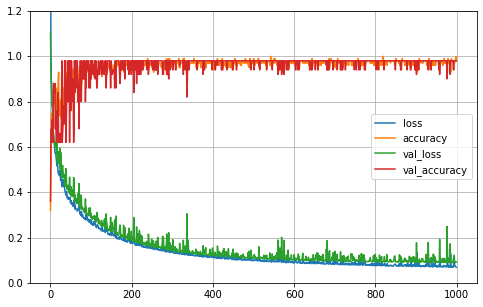

In [13]:
def plot_learning_curves(df):
    pd.DataFrame(df.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.2)
    plt.show()
    
plot_learning_curves(history)